***
# TEST
***

In [ ]:
import os
import json
import pandas as pd
import pvdeg
from pytest import approx
from pvdeg import TEST_DATA_DIR

# Load weather data
WEATHER = pd.read_csv(
    os.path.join(TEST_DATA_DIR, "weather_day_pytest.csv"), index_col=0, parse_dates=True
)
with open(os.path.join(TEST_DATA_DIR, "meta.json"), "r") as file:
    META = json.load(file)

# Load expected results
rh_expected = pd.read_csv(
    os.path.join(TEST_DATA_DIR, "input_day_pytest.csv"), index_col=0, parse_dates=True
)
rh_cols = [col for col in rh_expected.columns if "RH" in col]
rh_expected = rh_expected[rh_cols]


def test_module():
    """
    test pvdeg.humidity.calc_rel_humidity

    Requires:
    ---------
    weather dataframe and meta dictionary
    """
    result = pvdeg.humidity.module(WEATHER, META)
    pd.testing.assert_frame_equal(result, rh_expected, check_dtype=False)


def test_psat():
    """
    test pvdeg.humidity.psat

    Requires:
    ---------
    weahter dataframe and meta dictionary
    """
    psat_avg = pvdeg.humidity.psat(temp=WEATHER["temp_air"])[1]
    assert psat_avg == approx(0.47607, abs=5e-5)

In [ ]:
test_psat()

In [ ]:
import pvdeg
from pvdeg import TEST_DATA_DIR
import os
import pandas as pd

In [ ]:
sample_df = pd.read_csv(os.path.join(TEST_DATA_DIR, "diffusion_2d_input.csv"), index_col=0)

sample_df.index = pd.to_timedelta(sample_df.index)
sample_df.index = sample_df.index.values.astype("timedelta64[s]")

In [ ]:
res = pvdeg.diffusion.module_front(
    time_index=sample_df.index,
    backsheet_moisture=sample_df["Back Encapsulant Moisture"],
    sample_temperature=sample_df["Sample Temperature"],
    p=0.1,
    CW=15.6,
    nodes=20,
    eva_diffusivity_ea=0.395292897,
    Dif=2.31097881676966,
    n_steps=20,
)

In [ ]:
import pandas as pd
import numpy as np
import pvdeg
from pvdeg import TEST_DATA_DIR
import os

In [ ]:
setpoints = pd.read_csv(os.path.join(TEST_DATA_DIR, "chamber-setpoints.csv"), skiprows=[1])

In [ ]:
test_chamber = pvdeg.chamber.Chamber(os.path.join(TEST_DATA_DIR, "chamber-setpoints.csv"), setpoint_names=["temperature", "relative_humidity"], skiprows=[1])

test_chamber.setpoints = test_chamber.setpoints.iloc[:100]

Test Chamber Conditions

In [ ]:
chamber_result = test_chamber.chamber_conditions(tau_c=10, air_temp_0=25).iloc[:100]

chamber_result.to_csv("chamber_conditions_result.csv")

In [ ]:
CHAMBER_CONDITIONS = pd.read_csv("chamber_conditions_result.csv", index_col=0)
CHAMBER_CONDITIONS.index = CHAMBER_CONDITIONS.index.astype("timedelta64[s]")

pd.testing.assert_frame_equal(chamber_result, CHAMBER_CONDITIONS, check_dtype=False)

Test sample conditions

In [ ]:
test_chamber.setBacksheet(id='ST504', thickness=0.5) # PET
test_chamber.setEncapsulant(id='EVA', thickness=0.1) # EVA
sample_result = test_chamber.sample_conditions(tau_s=15, sample_temp_0=25, n_steps=20)

In [ ]:
sample_result.to_csv("sample_conditions_results.csv")

In [ ]:
SAMPLE_CONDITIONS = pd.read_csv(os.path.join(TEST_DATA_DIR, "sample_conditions_results.csv"), index_col=0)
SAMPLE_CONDITIONS.index = SAMPLE_CONDITIONS.index.astype("timedelta64[s]")

pd.testing.assert_frame_equal(sample_result, SAMPLE_CONDITIONS)

In [ ]:
test_chamber.plot_setpoints()

In [ ]:
test_chamber.calc_temperatures(air_temp_0=25, sample_temp_0=25, tau_c=10, tau_s=15)

pd.testing.assert_series_equal(test_chamber.air_temperature, CHAMBER_CONDITIONS["Air Temperature"], check_dtype=False)
pd.testing.assert_series_equal(test_chamber.sample_temperature, SAMPLE_CONDITIONS["Sample Temperature"], check_dtype=False)

In [ ]:
SAMPLE_CONDITIONS

In [ ]:
bad_df = pd.DataFrame(np.nan, index=pd.RangeIndex(5), columns=["Temperature"])

In [ ]:
pvdeg.chamber.setpoint_series(df=bad_df, setpoint_name="Temperature")

In [ ]:
import pytest
with pytest.raises(ValueError) as excinfo:
    pvdeg.chamber.setpoint_series(df=bad_df, setpoint_name="Temperature")

# Check that the exception message is correct
assert str(excinfo.value) == "column: Temperature contains NaN values. Remove from setpoint list or remove NaN's in input."

In [ ]:
import pandas as pd
import os 
import numpy as np
import pvdeg
from pvdeg import TEST_DATA_DIR

CHAMBER_CONDITIONS = pd.read_csv(
    os.path.join(TEST_DATA_DIR, "chamber_conditions_result.csv"), index_col=0
)
CHAMBER_CONDITIONS.index = CHAMBER_CONDITIONS.index.astype("timedelta64[s]")

SAMPLE_CONDITIONS = pd.read_csv(
    os.path.join(TEST_DATA_DIR, "sample_conditions_results.csv"), index_col=0
)
SAMPLE_CONDITIONS.index = SAMPLE_CONDITIONS.index.astype("timedelta64[s]")

test_chamber = pvdeg.chamber.Chamber(
    os.path.join(TEST_DATA_DIR, "chamber-setpoints.csv"),
    setpoint_names=["temperature", "relative_humidity"],
    skiprows=[1],
)

test_chamber.setDimensions()

test_chamber.setpoints = test_chamber.setpoints.iloc[:100]  # we only care about the first 100 setpoints

,setpoint_temperature,setpoint_relative_humidity
0 days 00:00:00,25.0,50.0
0 days 00:01:00,90.0,30.0
0 days 00:02:00,90.0,30.0
0 days 00:03:00,90.0,30.0
0 days 00:04:00,90.0,30.0
...,...,...
0 days 01:35:00,90.0,30.0
0 days 01:36:00,90.0,30.0
0 days 01:37:00,90.0,30.0
0 days 01:38:00,90.0,30.0

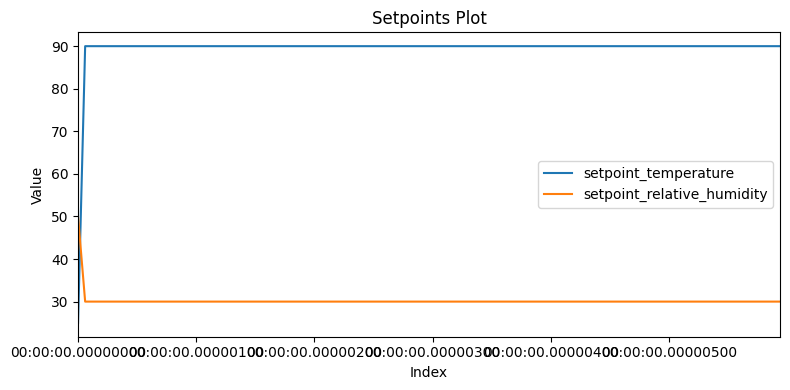

In [2]:
test_chamber

In [3]:
# def test_chamber_conditions():
test_chamber.setpoints = test_chamber.setpoints  # .iloc[:100]
chamber_result = test_chamber.chamber_conditions(tau_c=10, air_temp_0=25)

pd.testing.assert_frame_equal(chamber_result, CHAMBER_CONDITIONS, check_dtype=False)

In [10]:
# def test_chamber_sample_conditions():

test_chamber.setDimensions(0.1, 0.1)

test_chamber.setpoints = test_chamber.setpoints  # .iloc[:100]

test_chamber.setBacksheet(pvdeg_file="O2permeation", key="OX002", thickness=0.5) # ST504/PET1
test_chamber.setEncapsulant(pvdeg_file="O2permeation", key="OX003", thickness=0.1)  # EVA
test_chamber.setAbsorptance(0.03)

sample_result = test_chamber.sample_conditions(
    tau_s=15, sample_temp_0=25, n_steps=20
)

pd.testing.assert_frame_equal(sample_result, SAMPLE_CONDITIONS)


              "irradiance_full" not in setpoints_df.columns 
              Current column names Index(['setpoint_temperature', 'setpoint_relative_humidity'], dtype='object').
              calculating sample temperature without irradiance"
              


AssertionError: DataFrame.iloc[:, 2] (column name="Equilibrium Encapsulant Water") are different

DataFrame.iloc[:, 2] (column name="Equilibrium Encapsulant Water") values are different (100.0 %)
[index]: [0 seconds, 60 seconds, 120 seconds, 180 seconds, 240 seconds, 300 seconds, 360 seconds, 420 seconds, 480 seconds, 540 seconds, 600 seconds, 660 seconds, 720 seconds, 780 seconds, 840 seconds, 900 seconds, 960 seconds, 1020 seconds, 1080 seconds, 1140 seconds, 1200 seconds, 1260 seconds, 1320 seconds, 1380 seconds, 1440 seconds, 1500 seconds, 1560 seconds, 1620 seconds, 1680 seconds, 1740 seconds, 1800 seconds, 1860 seconds, 1920 seconds, 1980 seconds, 2040 seconds, 2100 seconds, 2160 seconds, 2220 seconds, 2280 seconds, 2340 seconds, 2400 seconds, 2460 seconds, 2520 seconds, 2580 seconds, 2640 seconds, 2700 seconds, 2760 seconds, 2820 seconds, 2880 seconds, 2940 seconds, 3000 seconds, 3060 seconds, 3120 seconds, 3180 seconds, 3240 seconds, 3300 seconds, 3360 seconds, 3420 seconds, 3480 seconds, 3540 seconds, 3600 seconds, 3660 seconds, 3720 seconds, 3780 seconds, 3840 seconds, 3900 seconds, 3960 seconds, 4020 seconds, 4080 seconds, 4140 seconds, 4200 seconds, 4260 seconds, 4320 seconds, 4380 seconds, 4440 seconds, 4500 seconds, 4560 seconds, 4620 seconds, 4680 seconds, 4740 seconds, 4800 seconds, 4860 seconds, 4920 seconds, 4980 seconds, 5040 seconds, 5100 seconds, 5160 seconds, 5220 seconds, 5280 seconds, 5340 seconds, 5400 seconds, 5460 seconds, 5520 seconds, 5580 seconds, 5640 seconds, 5700 seconds, 5760 seconds, 5820 seconds, 5880 seconds, 5940 seconds]
[left]:  [8.296539766226004e-05, 7.099298023618149e-05, 9.484272138579925e-05, 0.00012006648527185322, 0.00014539257092955425, 0.00016970615873606996, 0.00019214392390983008, 0.00021212340928985035, 0.0002293257239905421, 0.00024365186410026603, 0.0002551692032873313, 0.0002640592212130184, 0.00027057250470099184, 0.00027499333898426087, 0.0002776138802011277, 0.0002787166888867022, 0.000278563949156287, 0.00027739168834647735, 0.0002754075225909064, 0.00027279074329691287, 0.00026969384876644026, 0.00026624487707510624, 0.00026255009847941246, 0.00025869677893016455, 0.0002547558374724731, 0.00025078429789584367, 0.0002468274871075395, 0.00024292096626717013, 0.0002390922012307192, 0.00023536199045424752, 0.00023174567422153933, 0.0002282541510218419, 0.00022489472658450202, 0.00022167181946425012, 0.00021858754480882255, 0.00021564219543706992, 0.00021283463685728264, 0.00021016263050218736, 0.0002076230973199522, 0.00020521233196721522, 0.0002029261762022492, 0.00020076015866055306, 0.00019870960699064444, 0.00019676973731071998, 0.00019493572509293036, 0.00019320276086844945, 0.00019156609355222033, 0.00019002106369284678, 0.00018856312854420492, 0.0001871878805172556, 0.00018589106029123843, 0.0001846685656330821, 0.00018351645678402157, 0.0001824309591160449, 0.00018140846363217487, 0.00018044552577875964, 0.0001795388629509998, 0.00017868535100150164, 0.000177882020002995, 0.00017712604946824487, 0.00017641476319073677, 0.00017574562383740626, 0.00017511622739822797, 0.00017452429757586915, 0.00017396768018095252, 0.00017344433758408883, 0.00017295234326412354, 0.00017248987648253497, 0.00017205521710621666, 0.00017164674059465037, 0.0001712629131624777, 0.00017090228712445722, 0.00017056349642660093, 0.00017024525236474452, 0.00016994633948982238, 0.00016966561169756418, 0.00016940198849914225, 0.00016915445146839435, 0.00016892204086060402, 0.00016870385239731896, 0.000168499034211395, 0.00016830678394624268, 0.00016812634600315478, 0.000167957008930572, 0.0001677981029491825, 0.0001676489976068267, 0.00016750909955730677, 0.00016737785045734012, 0.00016725472497606267, 0.00016713922891166774, 0.00016703089740995207, 0.00016692929327974032, 0.00016683400540034254, 0.0001667446472164147, 0.0001666608553157722, 0.00016658228808590176, 0.0001665086244451115, 0.00016643956264444, 0.00016637481913661697, 0.00016631412750855467]
[right]: [9.593506521235106e-05, 8.278774548508793e-05, 0.0001123268671892, 0.000145256638025, 0.0001805109371539, 0.0002170125630557, 0.0002537707740315, 0.0002899402048726, 0.0003248465944756, 0.0003579881120011, 0.000389021169108, 0.0004177380737533, 0.000444041848182, 0.0004679216310724, 0.0004894305761266, 0.000508667093619, 0.0005257595996375, 0.0005408545474895, 0.0005541073264404, 0.000565675550865, 0.0005757142742102, 0.000584372710654, 0.0005917921103794, 0.0005981044988675, 0.0006034320497967, 0.0006078869121262, 0.0006115713541043, 0.0006145781207993, 0.0006169909283672, 0.000618885038848, 0.0006203278749727, 0.0006213796463081, 0.0006220939669073, 0.0006225184511798, 0.0006226952794945, 0.0006226617285093, 0.0006224506637178, 0.0006220909934665, 0.0006216080849116, 0.0006210241432066, 0.0006203585557349, 0.0006196282035173, 0.0006188477420835, 0.000618029854152, 0.0006171854764386, 0.0006163240028407, 0.000615453466141, 0.0006145807002432, 0.0006137114848187, 0.0006128506741008, 0.0006120023114227, 0.0006111697309575, 0.0006103556479899, 0.0006095622389258, 0.0006087912121293, 0.0006080438705719, 0.0006073211671799, 0.0006066237536765, 0.0006059520236328, 0.0006053061503684, 0.0006046861202735, 0.0006040917620656, 0.0006035227724382, 0.0006029787385087, 0.0006024591574308, 0.0006019634534945, 0.0006014909930037, 0.0006010410971881, 0.0006006130533781, 0.0006002061246464, 0.0005998195580972, 0.0005994525919637, 0.0005991044616572, 0.0005987744048929, 0.0005984616660078, 0.0005981654995674, 0.0005978851733515, 0.0005976199707977, 0.0005973691929709, 0.0005971321601207, 0.0005969082128821, 0.0005966967131659, 0.0005964970447828, 0.0005963086138373, 0.0005961308489262, 0.0005959632011687, 0.0005958051440954, 0.0005956561734182, 0.0005955158067004, 0.0005953835829451, 0.0005952590621157, 0.0005951418246038, 0.0005950314706535, 0.0005949276197544, 0.0005948299100103, 0.0005947379974912, 0.0005946515555766, 0.0005945702742934, 0.000594493859654, 0.0005944220329998]
At positional index 0, first diff: 8.296539766226004e-05 != 9.593506521235106e-05